Импорт библиотек и файлов



In [146]:
import pandas as pd
import numpy as np

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
data_without_mono=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/БД_без_моно_full.xlsx")
data_with_mono=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/БД_с_моно_full.xlsx")
data_d=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Показатель_D.xlsx")
data_f=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Показатель_F.xlsx")

# **task 1**

In [149]:
data_total=pd.concat([data_with_mono, data_without_mono])

In [150]:
data_total['CaseID']=np.where(data_total['CaseID'].isnull(),data_total['CaseID'].max()+1,data_total['CaseID'])

In [151]:
data_total.sort_values(by='Start')

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac
5755,389920.0,ж,79,2021-05-07,2021-06-30,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,NaN,NaN
1829,376917.0,ж,65,2021-05-08,2021-07-14,ИНФ (крайне тяжелое течение) с терапией без ЛП,Выписан,Нет,NaN
2120,389920.0,ж,49,2021-05-11,2021-06-25,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,NaN,NaN
4044,377133.0,м,74,2021-05-14,2021-06-25,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет
5581,389920.0,ж,65,2021-05-20,2021-06-29,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5080,389763.0,ж,91,2022-02-16,2022-02-19,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет
2477,389756.0,м,86,2022-02-16,2022-02-17,ИНФ (тяжелое течение) с терапией и ЛП,Умер,Нет,NaN
4825,389824.0,ж,84,2022-02-17,2022-02-18,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет
2857,389919.0,ж,91,2022-02-18,2022-02-19,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет


In [152]:
data_no_duplicates=data_total.drop_duplicates(subset=['CaseID'],keep='last')

In [153]:
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7807 entries, 0 to 6261
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CaseID   7807 non-null   float64       
 1   Gender   7807 non-null   object        
 2   Age      7807 non-null   int64         
 3   Start    7807 non-null   datetime64[ns]
 4   End      7807 non-null   datetime64[ns]
 5   Ther     7807 non-null   object        
 6   Outcome  7807 non-null   object        
 7   Vacin    2197 non-null   object        
 8   Vac      5442 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 609.9+ KB


In [154]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10541 entries, 0 to 10540
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CaseID       10541 non-null  int64  
 1   Показатель   10541 non-null  object 
 2   Результат_D  10001 non-null  object 
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Записей      1 non-null      float64
 7   Уникальных   1 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 658.9+ KB


In [155]:
data_d.isnull().sum()

CaseID             0
Показатель         0
Результат_D      540
Unnamed: 3     10541
Unnamed: 4     10541
Unnamed: 5     10541
Записей        10540
Уникальных     10540
dtype: int64

In [156]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Дата результата  10377 non-null  object 
 1   IDS              10395 non-null  int64  
 2   Дата взятия      10395 non-null  object 
 3   CaseID           10395 non-null  int64  
 4   Показатель_F     10395 non-null  object 
 5   Результат        10377 non-null  object 
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       2 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 649.8+ KB


In [157]:
data_f.isnull().sum()

Дата результата       18
IDS                    0
Дата взятия            0
CaseID                 0
Показатель_F           0
Результат             18
Unnamed: 6         10395
Unnamed: 7         10393
dtype: int64

In [158]:
data_outcome=data_no_duplicates.loc[((data_no_duplicates['Outcome']=="Выписан")|(data_no_duplicates['Outcome']=="Умер"))]

# **task 2**

In [159]:
data_outcome['Vaccine']=data_outcome.Vac.combine_first(data_outcome.Vacin)

<ipython-input-159-e15520923a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outcome['Vaccine']=data_outcome.Vac.combine_first(data_outcome.Vacin)


In [160]:
data_outcome['Vaccine']=data_outcome['Vaccine'].fillna("Нет")

<ipython-input-160-bef0d73dc0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outcome['Vaccine']=data_outcome['Vaccine'].fillna("Нет")


In [161]:
data_outcome["Vac Y/N"]=np.where(data_outcome['Vaccine']=="Нет","Нет","Да")

<ipython-input-161-73707f85bd63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outcome["Vac Y/N"]=np.where(data_outcome['Vaccine']=="Нет","Нет","Да")


In [162]:
data_outcome.Ther.unique()

array(['ИНФ (тяжелое течение) с терапией без ЛП',
       'ИНФ (среднетяжелое течение) с терапией без ЛП',
       'ИНФ (тяжелое течение) с терапией и ЛП',
       'ИНФ (среднетяжелое течение) с терапией и ЛП',
       'ИНФ (крайне тяжелое течение) с терапией без ЛП',
       'ИНФ (крайне  тяжелое течение) с терапией и ЛП',
       'ИНФ (среднетяжелое течение) без ЛП и терапии',
       'ИНФ (тяжелое течение) без ЛП и терапии',
       'ИНФ (среднетяжелое течение) с ЛП без терапии',
       'ИНФ (крайне тяжелое течение) без ЛП и терапии'], dtype=object)

In [163]:
data_outcome["Ther Y/N"]=np.where((data_outcome['Ther']=="ИНФ (среднетяжелое течение) без ЛП и терапии")|(data_outcome['Ther']=="ИНФ (тяжелое течение) без ЛП и терапии")|(data_outcome['Ther']=="ИНФ (среднетяжелое течение) с ЛП без терапии")|(data_outcome['Ther']=="ИНФ (крайне тяжелое течение) без ЛП и терапии"),"Нет","Да")

<ipython-input-163-80131b8d2cec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outcome["Ther Y/N"]=np.where((data_outcome['Ther']=="ИНФ (среднетяжелое течение) без ЛП и терапии")|(data_outcome['Ther']=="ИНФ (тяжелое течение) без ЛП и терапии")|(data_outcome['Ther']=="ИНФ (среднетяжелое течение) с ЛП без терапии")|(data_outcome['Ther']=="ИНФ (крайне тяжелое течение) без ЛП и терапии"),"Нет","Да")


In [164]:
data_outcome

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N
0,383563.0,ж,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
2,238599.0,ж,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
4,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
5,382371.0,ж,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
6,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
6257,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6258,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6259,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6260,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет


## ***Анализ по вакцинам***

2 pie chart with detail information

In [165]:
table_gender=pd.pivot_table(data_outcome[['Gender','Vaccine']],index=['Vaccine'],columns=['Gender'],aggfunc=len)
table_gender=table_gender.fillna(0)
table_gender

Gender,ж,м
Vaccine,,
Phizer,1.0,0.0
Ковивак,67.0,45.0
Нет,3854.0,2454.0
Спутник V,577.0,440.0
Спутник Лайт,76.0,72.0
Эпиваккорона,63.0,37.0


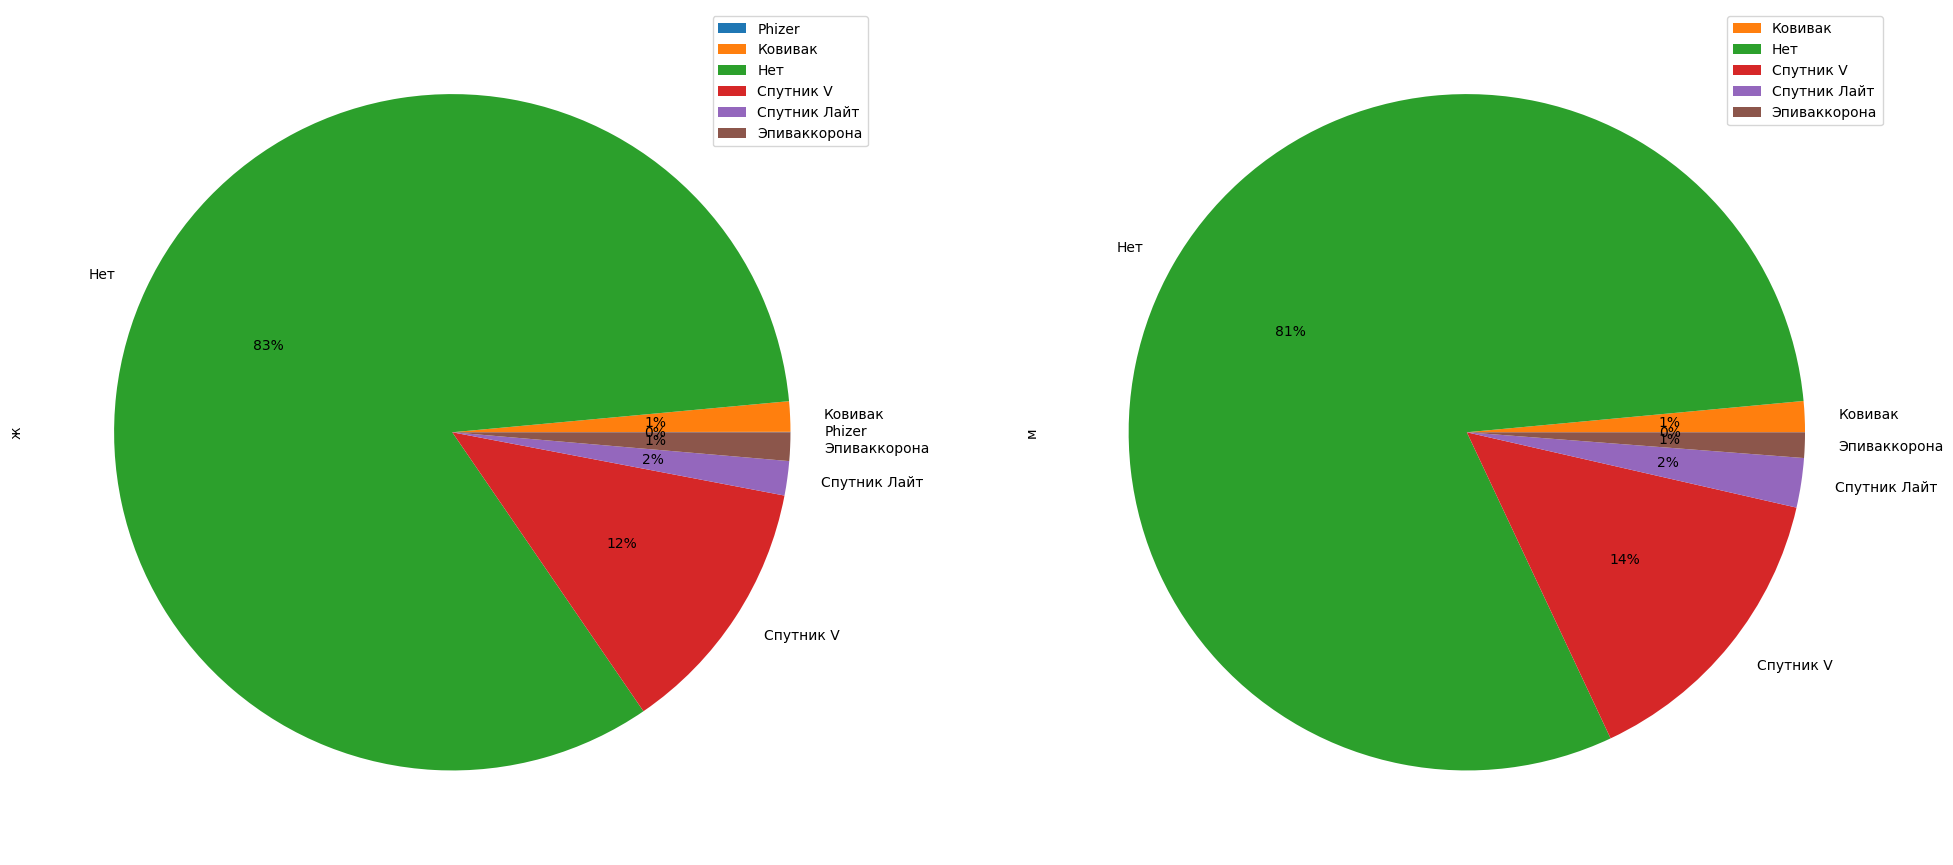

In [166]:
pie_chart_gender=table_gender.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

2 pie chart with general information

In [167]:
table_gender_gen=pd.pivot_table(data_outcome[['Gender','Vac Y/N']],index=['Gender'],columns=['Vac Y/N'],aggfunc=len)
table_gender_gen=table_gender_gen.fillna(0)
table_gender_gen

Vac Y/N,Да,Нет
Gender,,
ж,784,3854
м,594,2454


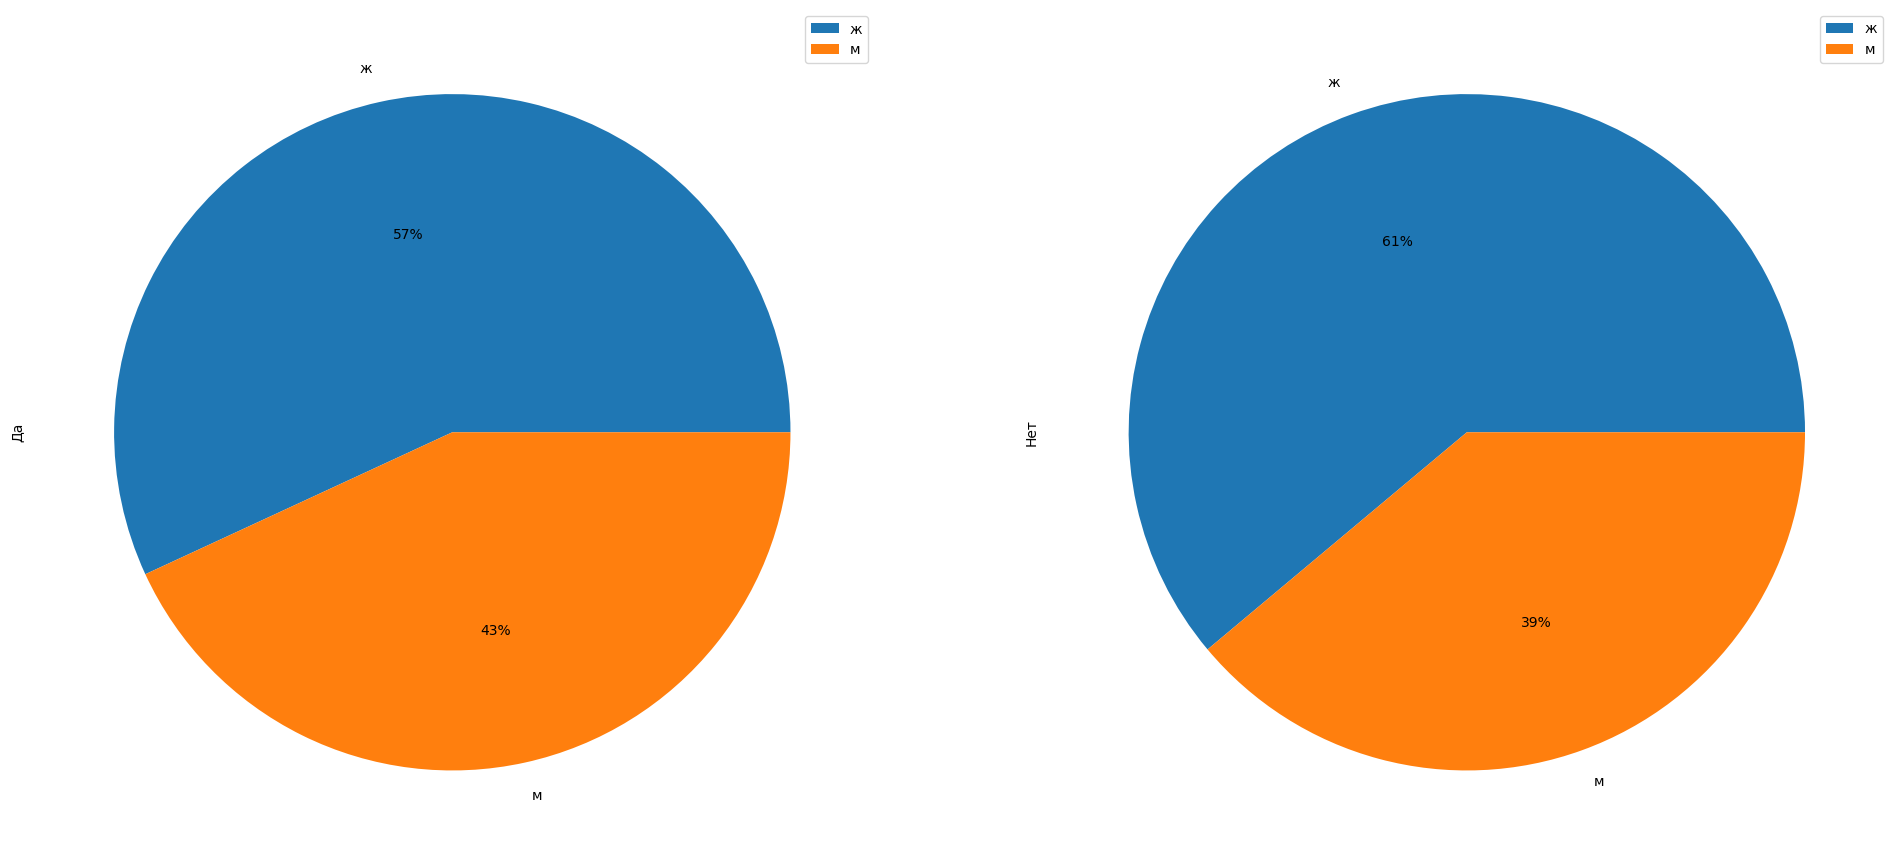

In [168]:
pie_chart_vac_gender=table_gender_gen.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

mean age

In [169]:
mean_age_vac_y_n=data_outcome[["Vac Y/N","Age"]].groupby("Vac Y/N").mean()
mean_age_vac_y_n

,Age
Vac Y/N,
Да,63.619013
Нет,65.746354


In [170]:
table_outcome_vac=pd.pivot_table(data_outcome[['Outcome','Vac Y/N']],index=['Outcome'],columns=['Vac Y/N'],aggfunc=len)
table_outcome_vac=table_outcome_vac.fillna(0)
table_outcome_vac

Vac Y/N,Да,Нет
Outcome,,
Выписан,1198,4710
Умер,180,1598


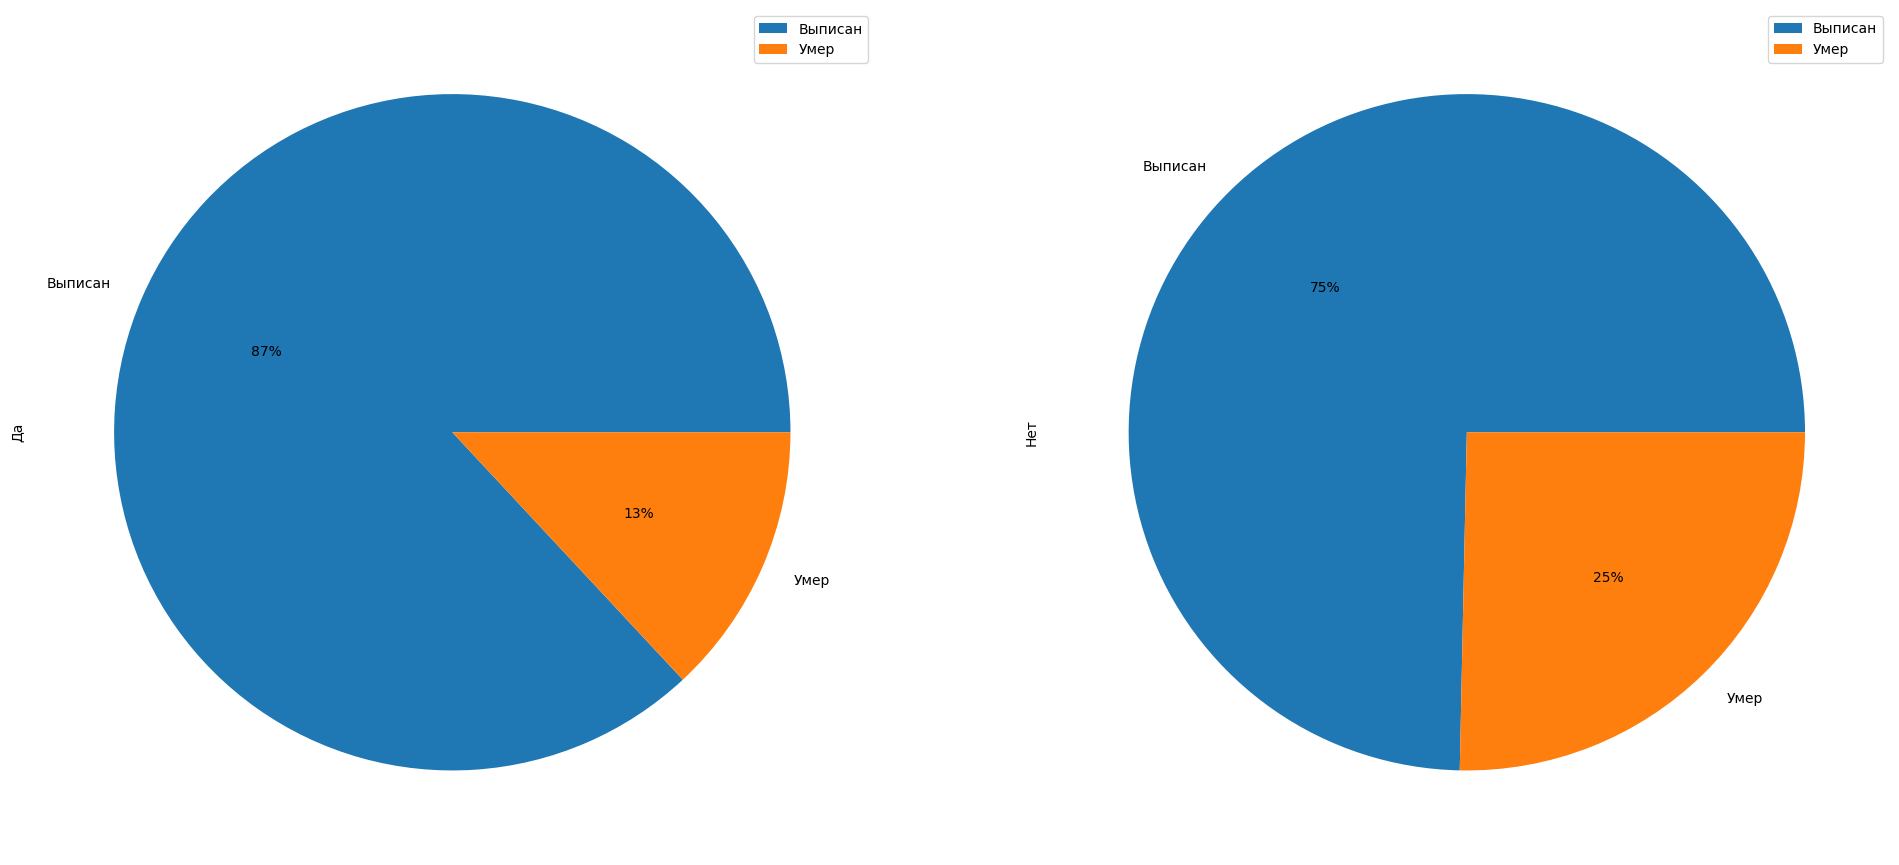

In [171]:
pie_chart_vac_outcome=table_outcome_vac.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

## ***Анализ по терапии***

In [172]:
table_gender_gen_ther=pd.pivot_table(data_outcome[['Gender','Ther Y/N']],index=['Gender'],columns=['Ther Y/N'],aggfunc=len)
table_gender_gen_ther=table_gender_gen_ther.fillna(0)
table_gender_gen_ther

Ther Y/N,Да,Нет
Gender,,
ж,1306,3332
м,980,2068


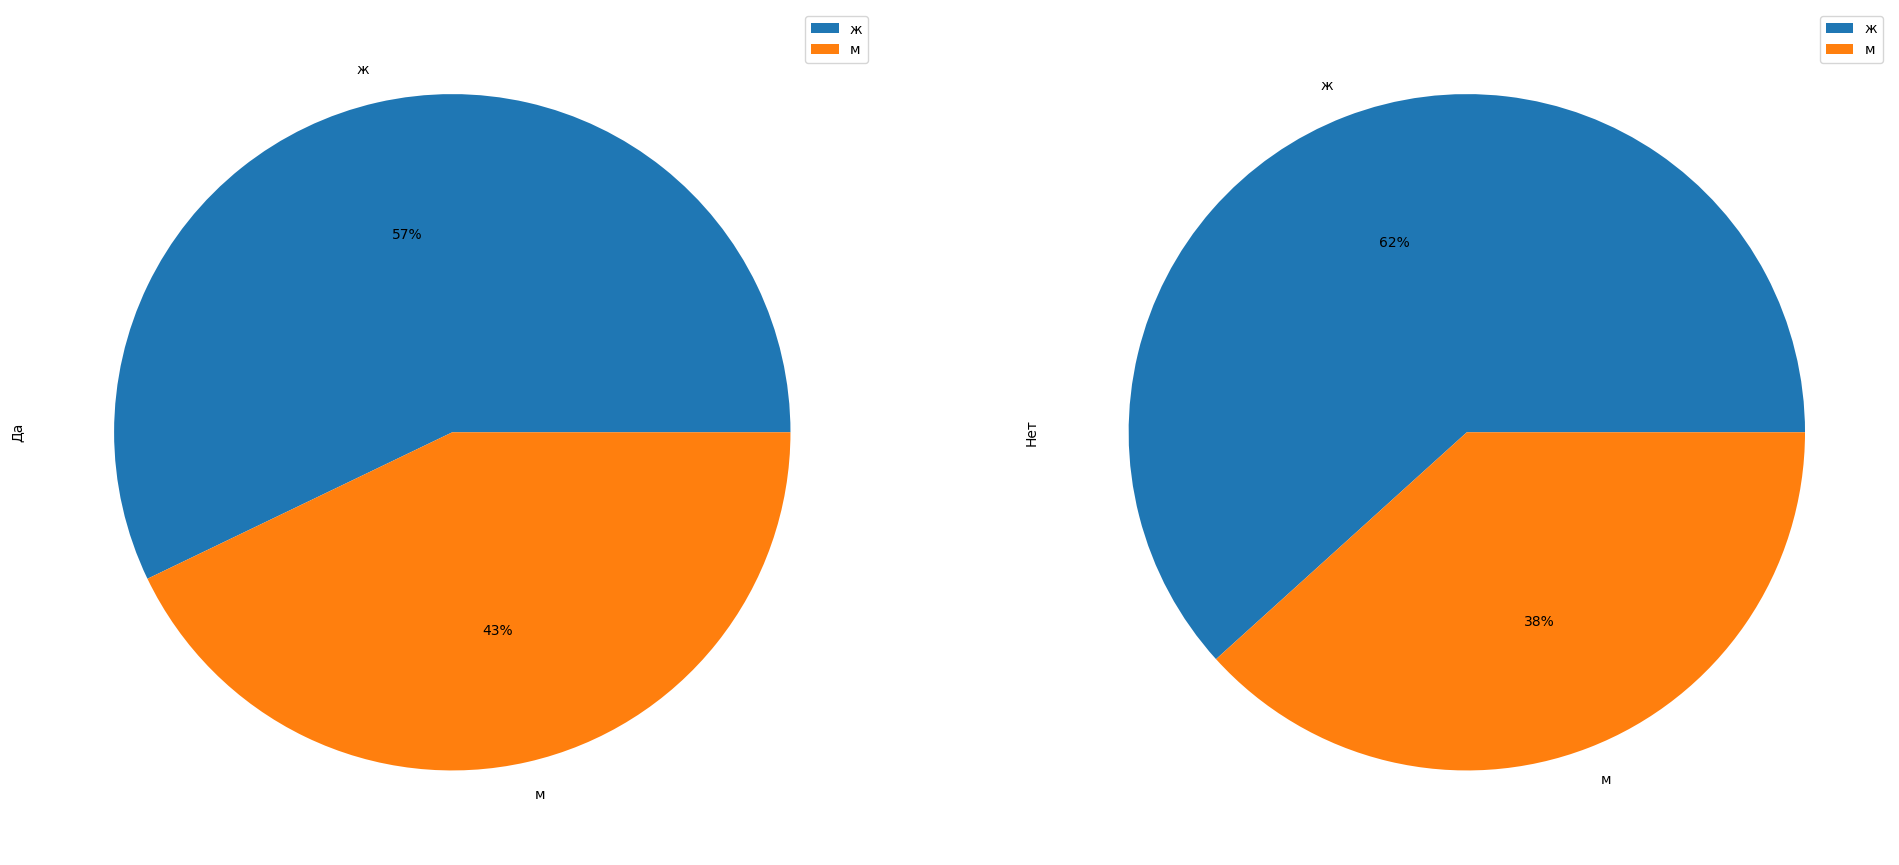

In [173]:
pie_chart_ther_gender=table_gender_gen_ther.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

mean age

In [174]:
mean_age_ther_y_n=data_outcome[["Ther Y/N","Age"]].groupby("Ther Y/N").mean()
mean_age_ther_y_n

,Age
Ther Y/N,
Да,64.299213
Нет,65.816111


In [175]:
table_outcome_ther=pd.pivot_table(data_outcome[['Outcome','Ther Y/N']],index=['Outcome'],columns=['Ther Y/N'],aggfunc=len)
table_outcome_ther=table_outcome_ther.fillna(0)
table_outcome_ther

Ther Y/N,Да,Нет
Outcome,,
Выписан,1712,4196
Умер,574,1204


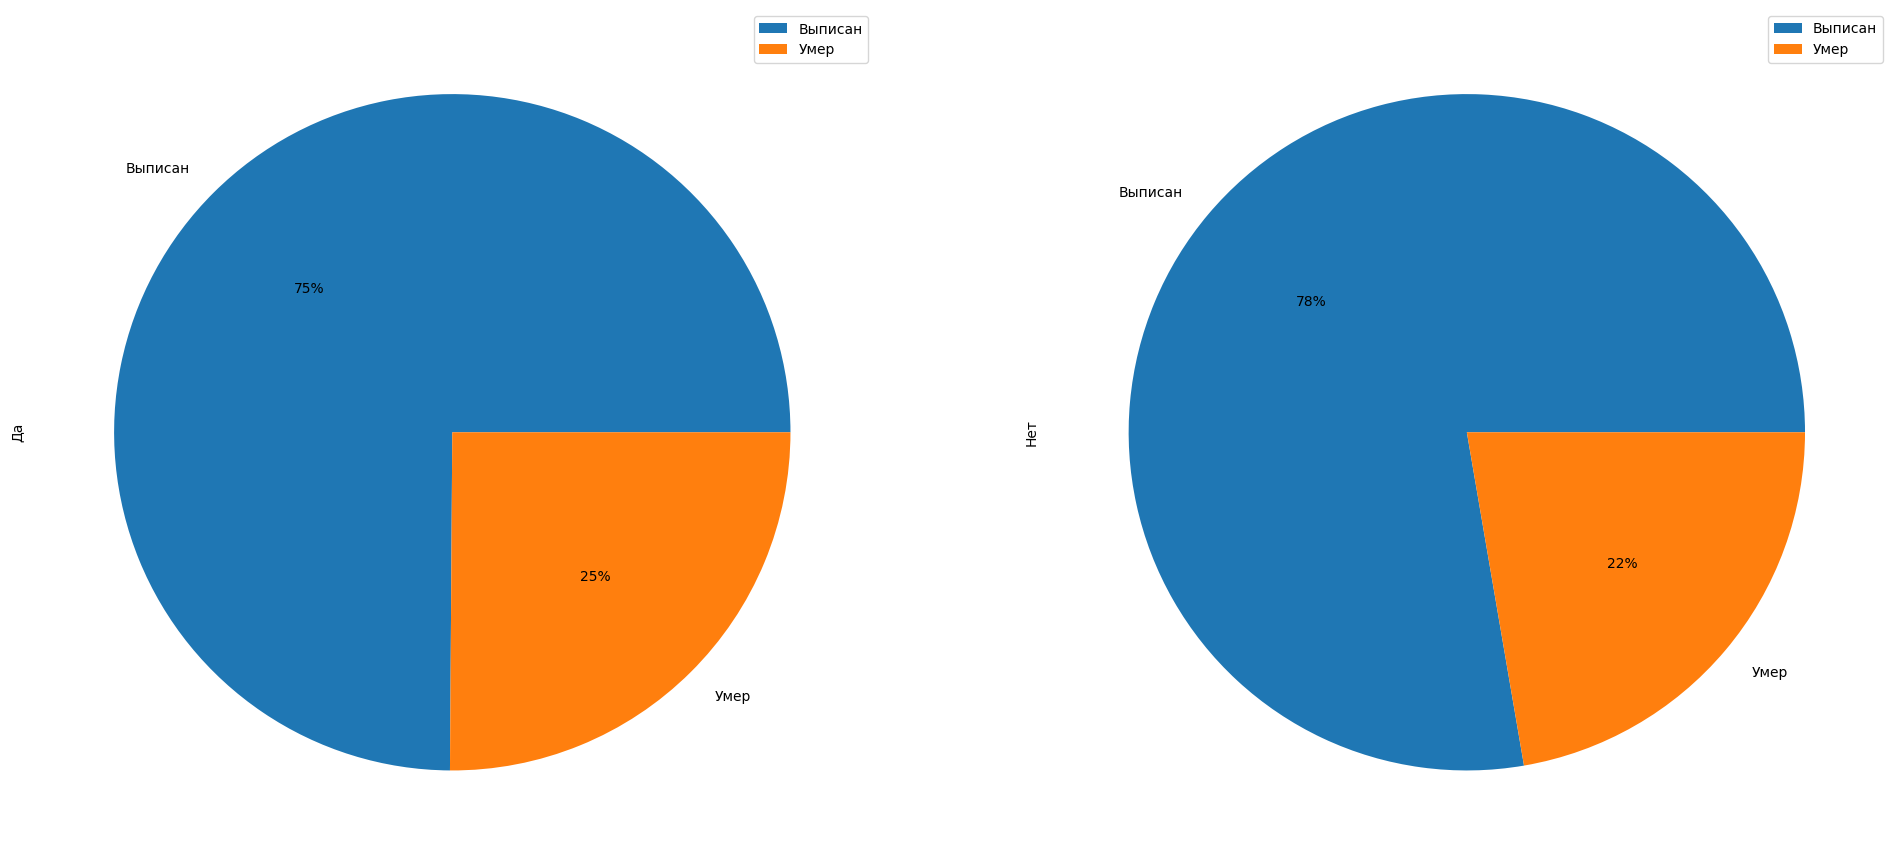

In [176]:
pie_chart_ther_outcome=table_outcome_ther.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

# **task 3**

добавляем в таблицу параметры d и f

In [177]:
data_d

,CaseID,Показатель,Результат_D,Unnamed: 3,Unnamed: 4,Unnamed: 5,Записей,Уникальных
0,381492,D-димер нг/мл,>3000,NaN,NaN,NaN,10541.0,9998.0
1,386532,D-димер нг/мл,747.5,NaN,NaN,NaN,NaN,NaN
2,389577,D-димер нг/мл,NaN,NaN,NaN,NaN,NaN,NaN
3,372366,D-димер нг/мл,1492,NaN,NaN,NaN,NaN,NaN
4,379796,D-димер нг/мл,62.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10536,384403,D-димер нг/мл,>3000,NaN,NaN,NaN,NaN,NaN
10537,384542,D-димер нг/мл,277.6,NaN,NaN,NaN,NaN,NaN
10538,213237,D-димер нг/мл,1843,NaN,NaN,NaN,NaN,NaN
10539,388468,D-димер нг/мл,>3000,NaN,NaN,NaN,NaN,NaN


остсортировать / удалить дубликаты

In [178]:
data_d=data_d.drop_duplicates('CaseID')

In [179]:
data_d=data_d.drop(['Показатель','Unnamed: 3','Unnamed: 4','Unnamed: 5','Записей','Уникальных'],axis='columns')

In [180]:
data_d

,CaseID,Результат_D
0,381492,>3000
1,386532,747.5
2,389577,NaN
3,372366,1492
4,379796,62.3
...,...,...
10535,384403,434.4
10537,384542,277.6
10538,213237,1843
10539,388468,>3000


In [181]:
data_d['Результат_D']=data_d['Результат_D'].fillna("0")
data_d['Результат_D']=np.where((data_d['Результат_D']==">3000"),"3001",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']==">3000.0"),"3001",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']==">"),"3001",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="более 3000"),"3001",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="сгусток!!!"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="перебрать"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="наруш-е соотношения"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="наруш.соотношения"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="сгусток"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="нет пробирки"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="перезабор.мало крови"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="наруш. соотношения"),"0",data_d['Результат_D'])
data_d['Результат_D']=np.where((data_d['Результат_D']=="нарушен-е соотношения"),"0",data_d['Результат_D'])
data_d['Результат_D'] = data_d['Результат_D'].astype(float)

In [182]:
data_d

,CaseID,Результат_D
0,381492,3001.0
1,386532,747.5
2,389577,0.0
3,372366,1492.0
4,379796,62.3
...,...,...
10535,384403,434.4
10537,384542,277.6
10538,213237,1843.0
10539,388468,3001.0


In [183]:
data_f

,Дата результата,IDS,Дата взятия,CaseID,Показатель_F,Результат,Unnamed: 6,Unnamed: 7
0,09.08.2021,886923,06.08.2021,381492,Ферритин,1146,NaN,NaN
1,13.12.2021,154296,10.12.2021,386532,Ферритин,54.22,NaN,NaN
2,14.02.2022,239389,13.02.2022,389577,Ферритин,318.5,NaN,NaN
3,12.11.2021,117155,11.11.2021,372366,Ферритин,1155,NaN,NaN
4,28.06.2021,838844,27.06.2021,379796,Ферритин,981,NaN,NaN
...,...,...,...,...,...,...,...,...
10390,20.12.2021,167992,17.12.2021,386792,Ферритин,1792,NaN,NaN
10391,06.01.2022,187538,05.01.2022,213237,Ферритин,994.5,NaN,NaN
10392,19.10.2021,978906,19.10.2021,384542,Ферритин,1472,NaN,NaN
10393,28.01.2022,213857,27.01.2022,388468,Ферритин,2009,NaN,NaN


In [184]:
data_f=data_f.drop_duplicates('CaseID')

In [185]:
data_f=data_f.drop(['Дата результата','IDS','Дата взятия','Показатель_F','Unnamed: 6','Unnamed: 7'],axis='columns')

In [186]:
data_f

,CaseID,Результат
0,381492,1146
1,386532,54.22
2,389577,318.5
3,372366,1155
4,379796,981
...,...,...
10390,386792,1792
10391,213237,994.5
10392,384542,1472
10393,388468,2009


In [187]:
data_f['Результат']=data_f['Результат'].fillna("0")
data_f['Результат']=np.where((data_f['Результат']=="перебрать"),"0",data_f['Результат'])
data_f['Результат']=np.where((data_f['Результат']=="нет пробирки"),"0",data_f['Результат'])
data_f['Результат']=np.where((data_f['Результат']=="283,8227,9"),"0",data_f['Результат'])
data_f['Результат'] = data_f['Результат'].astype(float)

In [188]:
data_f

,CaseID,Результат
0,381492,1146.00
1,386532,54.22
2,389577,318.50
3,372366,1155.00
4,379796,981.00
...,...,...
10390,386792,1792.00
10391,213237,994.50
10392,384542,1472.00
10393,388468,2009.00


In [189]:
data_outcome

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N
0,383563.0,ж,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
2,238599.0,ж,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
4,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
5,382371.0,ж,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да
6,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
6257,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6258,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6259,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет
6260,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет


In [190]:
data_outcome=data_outcome.merge(data_d, how='left', on='CaseID')

In [191]:
data_outcome

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D
0,383563.0,ж,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,77.62
1,238599.0,ж,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,83.51
2,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,604.00
3,382371.0,ж,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,449.60
4,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да,3001.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,168.60
7682,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,281.30
7683,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,277.60
7684,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.00


In [192]:
data_outcome=pd.merge(data_outcome, data_f, how='left', on='CaseID')

In [193]:
data_outcome


,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат
0,383563.0,ж,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,77.62,66.13
1,238599.0,ж,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,83.51,872.50
2,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,604.00,534.30
3,382371.0,ж,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,449.60,1133.00
4,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да,3001.00,909.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,168.60,320.20
7682,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,281.30,1010.00
7683,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,277.60,1472.00
7684,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.00,2009.00


Разбиваем на 2 таблицы: с терапией и без терапии

In [194]:
data_with_ther=data_outcome.loc[(data_outcome['Ther Y/N']=="Да")]
data_with_ther

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат
0,383563.0,ж,46,2021-09-30,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,77.62,66.13
1,238599.0,ж,55,2021-07-08,2021-07-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,83.51,872.50
2,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,604.00,534.30
3,382371.0,ж,61,2021-09-01,2021-10-01,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,449.60,1133.00
4,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да,3001.00,909.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,385894.0,ж,56,2021-11-23,2021-12-09,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет,NaN,Нет,Нет,Да,987.20,140.00
2282,384105.0,ж,74,2021-10-09,2021-11-03,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,Нет,NaN,Нет,Нет,Да,1067.00,429.00
2283,385476.0,ж,76,2021-11-10,2021-11-23,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,Нет,NaN,Нет,Нет,Да,2488.00,1584.00
2284,384403.0,м,59,2021-10-15,2021-10-29,ИНФ (тяжелое течение) с терапией без ЛП,Умер,Нет,NaN,Нет,Нет,Да,434.40,1610.00


In [195]:
data_without_ther=data_outcome.loc[(data_outcome['Ther Y/N']=="Нет")]
data_without_ther

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат
2286,381492.0,ж,82,2021-08-06,2021-08-20,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.0,1146.00
2287,386532.0,ж,65,2021-12-10,2021-12-15,ИНФ (среднетяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,747.5,54.22
2288,372366.0,м,76,2021-11-11,2021-11-13,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,1492.0,1155.00
2289,379796.0,ж,72,2021-06-27,2021-07-05,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,62.3,981.00
2290,381175.0,ж,40,2021-07-28,2021-08-13,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,246.8,78.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,168.6,320.20
7682,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,281.3,1010.00
7683,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,277.6,1472.00
7684,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.0,2009.00


Разделим на 2 типа по степени тяжести протекания заболевания

In [196]:
data_with_ther["TherHM"]=np.where(((data_with_ther['Ther']=="ИНФ (среднетяжелое течение) с терапией и ЛП")|(data_with_ther['Ther']=="ИНФ (среднетяжелое течение) с терапией без ЛП")),"Middle","Hard")
data_without_ther["TherHM"]=np.where(((data_without_ther['Ther']=="ИНФ (среднетяжелое течение) без ЛП и терапии")|(data_without_ther['Ther']=="ИНФ (среднетяжелое течение) с ЛП без терапии")),"Middle","Hard")

<ipython-input-196-a1cbddc1b990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ther["TherHM"]=np.where(((data_with_ther['Ther']=="ИНФ (среднетяжелое течение) с терапией и ЛП")|(data_with_ther['Ther']=="ИНФ (среднетяжелое течение) с терапией без ЛП")),"Middle","Hard")
<ipython-input-196-a1cbddc1b990>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther["TherHM"]=np.where(((data_without_ther['Ther']=="ИНФ (среднетяжелое течение) без ЛП и терапии")|(data_without_ther['Ther']=="ИНФ (с

In [197]:
data_without_ther["Used"]="Нет"

<ipython-input-197-b8eb5cb42e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther["Used"]="Нет"


In [198]:
count_with_ther=data_with_ther.shape[0]
count_with_ther

2286

In [199]:
df_3 = pd.DataFrame({'CaseID1':[],'С терапией': [], 'Без терапии': [],'CaseID2':[]})
i = 0
k = 0
while i < count_with_ther:
  gend = data_with_ther.iloc[i]['Gender']
  age = data_with_ther.iloc[i]['Age']
  D = data_with_ther.iloc[i]['Результат_D']
  F = data_with_ther.iloc[i]['Результат']
  Hard = data_with_ther.iloc[i]['TherHM']
  ID=data_with_ther.iloc[i]['CaseID']
  cur = data_without_ther[(data_without_ther['Gender'] == gend) & (abs(data_without_ther['Age'] - age)<=3) & (data_without_ther['TherHM'] == Hard) & (abs(data_without_ther['Результат_D'] - D) < D*0.1) & (abs(data_without_ther['Результат'].astype(float) - F) < F*0.1) & (data_without_ther['Used'] == 'Нет')]
  
  if len(cur) > 0:
    k = k + 1
    df_temp = pd.DataFrame({'CaseID1':[data_with_ther.iloc[i]['CaseID']],'С терапией': [data_with_ther.iloc[i]['Outcome']], 'Без терапии': [cur.iloc[0]['Outcome']],'CaseID2':[cur.iloc[0]['CaseID']]})
    df_3 = pd.concat([df_3,df_temp]);
    #отметить людей без терапии, которые уже попали в таблицу
    data_without_ther.loc[(data_without_ther['CaseID']==cur.iloc[0]['CaseID']),'Used']="Да"
  i = i + 1

In [200]:
data_without_ther

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат,TherHM,Used
2286,381492.0,ж,82,2021-08-06,2021-08-20,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.0,1146.00,Middle,Да
2287,386532.0,ж,65,2021-12-10,2021-12-15,ИНФ (среднетяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,747.5,54.22,Middle,Нет
2288,372366.0,м,76,2021-11-11,2021-11-13,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,1492.0,1155.00,Hard,Нет
2289,379796.0,ж,72,2021-06-27,2021-07-05,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,62.3,981.00,Middle,Нет
2290,381175.0,ж,40,2021-07-28,2021-08-13,ИНФ (тяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,246.8,78.60,Hard,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,388760.0,ж,61,2022-02-01,2022-02-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,168.6,320.20,Middle,Нет
7682,382154.0,ж,83,2021-08-25,2021-09-07,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,281.3,1010.00,Middle,Да
7683,384542.0,ж,21,2021-10-18,2021-10-27,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,277.6,1472.00,Middle,Нет
7684,388468.0,ж,71,2022-01-27,2022-02-11,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,3001.0,2009.00,Middle,Нет


Пары по правилам, без учета статуса вакцинации

In [201]:
df_3

,CaseID1,С терапией,Без терапии,CaseID2
0,238599.0,Выписан,Выписан,380072.0
0,387627.0,Выписан,Выписан,385964.0
0,383501.0,Умер,Умер,383714.0
0,383786.0,Выписан,Умер,380029.0
0,385268.0,Выписан,Выписан,386947.0
...,...,...,...,...
0,384032.0,Выписан,Выписан,380385.0
0,386184.0,Выписан,Выписан,388054.0
0,382841.0,Выписан,Умер,387170.0
0,385740.0,Выписан,Выписан,381824.0


In [202]:
data_without_ther["Used"]="Нет"
df_4 = pd.DataFrame({'CaseID1':[],'С терапией': [], 'Без терапии': [],'CaseID2':[]})
i = 0
k = 0
while i < count_with_ther:
  gend = data_with_ther.iloc[i]['Gender']
  age = data_with_ther.iloc[i]['Age']
  D = data_with_ther.iloc[i]['Результат_D']
  F = data_with_ther.iloc[i]['Результат']
  Hard = data_with_ther.iloc[i]['TherHM']
  ID=data_with_ther.iloc[i]['CaseID']
  vac=data_with_ther.iloc[i]['Vac Y/N']
  cur = data_without_ther[(data_without_ther['Gender'] == gend) & (abs(data_without_ther['Age'] - age)<=3) & (data_without_ther['TherHM'] == Hard) & 
   (abs(data_without_ther['Результат_D'] - D) < D*0.1) & (abs(data_without_ther['Результат'].astype(float) - F) < F*0.1) & (data_without_ther['Used'] == 'Нет')
   & (data_without_ther['Vac Y/N'] == vac)]
  
  if len(cur) > 0:
    k = k + 1
    df_temp = pd.DataFrame({'CaseID1':[data_with_ther.iloc[i]['CaseID']],'С терапией': [data_with_ther.iloc[i]['Outcome']], 'Без терапии': [cur.iloc[0]['Outcome']],'CaseID2':[cur.iloc[0]['CaseID']]})
    df_4 = pd.concat([df_4,df_temp]);
    #отметить людей без терапии, которые уже попали в таблицу
    data_without_ther.loc[(data_without_ther['CaseID']==cur.iloc[0]['CaseID']),'Used']="Да"
  i = i + 1

<ipython-input-202-f7e2fc6d8c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther["Used"]="Нет"


Пары по правилам, с учетом статуса вакцинации

In [203]:
df_4

,CaseID1,С терапией,Без терапии,CaseID2
0,387627.0,Выписан,Выписан,385964.0
0,383501.0,Умер,Умер,383714.0
0,383786.0,Выписан,Умер,380029.0
0,384829.0,Выписан,Выписан,381492.0
0,387657.0,Выписан,Выписан,382263.0
...,...,...,...,...
0,383770.0,Выписан,Умер,314980.0
0,384032.0,Выписан,Выписан,351216.0
0,386184.0,Выписан,Выписан,380541.0
0,385740.0,Выписан,Выписан,381824.0


# task 5

In [204]:
list_id_with_ther=df_4['CaseID1'].tolist()

In [205]:
list_id_without_ther=df_4['CaseID2'].tolist()

In [206]:
df_filter1=data_with_ther['CaseID'].isin(list_id_with_ther)
data_with_ther=data_with_ther[df_filter1]

In [207]:
df_filter2=data_without_ther['CaseID'].isin(list_id_without_ther)
data_without_ther=data_without_ther[df_filter2]

In [208]:
#объединяю 2 таблицы - общая выборка 2*746
data_from_pair=pd.concat([data_with_ther,data_without_ther])

In [209]:
table_outcome_ther_pair=pd.pivot_table(data_from_pair[['Outcome','Ther Y/N']],columns=['Ther Y/N'],index=['Outcome'],aggfunc=len)
table_outcome_ther_pair

Ther Y/N,Да,Нет
Outcome,,
Выписан,618,578
Умер,128,168


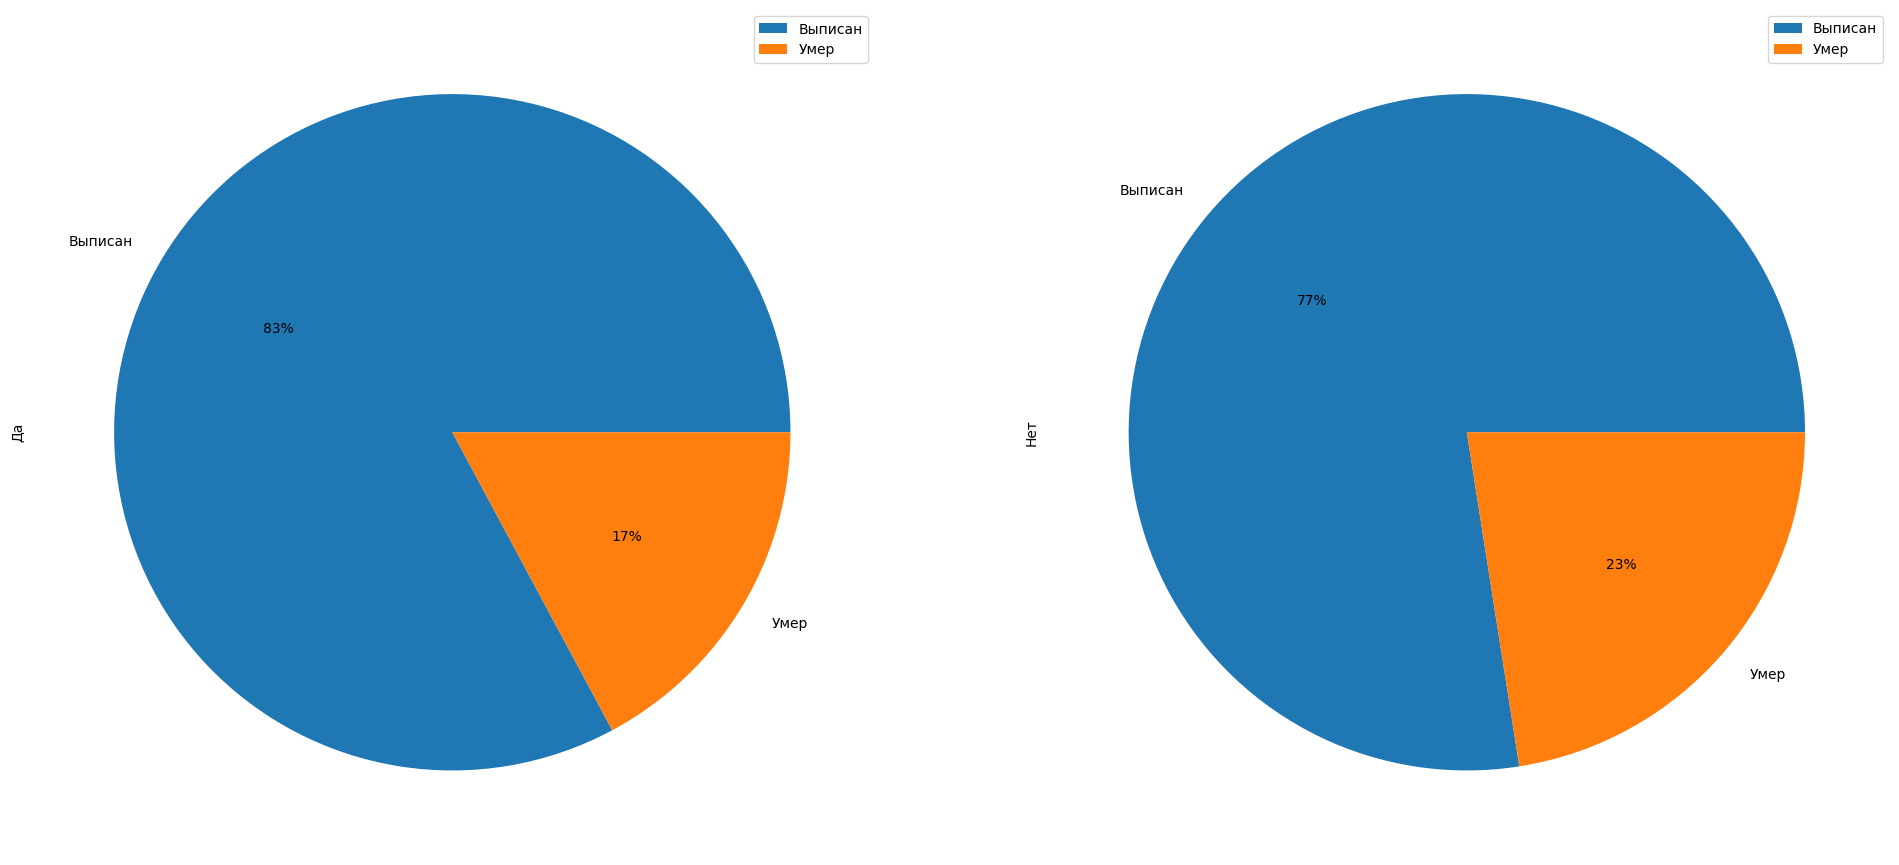

In [210]:
pie_chart__outcome_ther_pair=table_outcome_ther_pair.plot.pie(subplots=True, figsize=(24,12),autopct='%1.0f%%')

In [211]:
from datetime import timedelta

In [212]:
#период пребывания в больнице
data_from_pair['Time']=data_from_pair['End']-data_from_pair['Start']

In [213]:
data_from_pair['Time']=data_from_pair['Time'].dt.days

In [214]:
data_from_pair

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат,TherHM,Used,Time
2,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,604.00,534.3,Middle,NaN,26
4,383501.0,ж,82,2021-09-29,2021-10-09,ИНФ (тяжелое течение) с терапией без ЛП,Умер,NaN,NaN,Нет,Нет,Да,3001.00,909.5,Hard,NaN,10
5,383786.0,м,69,2021-10-04,2021-10-29,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,367.60,1583.0,Hard,NaN,25
9,384829.0,ж,82,2021-10-26,2021-11-06,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,3001.00,1173.0,Middle,NaN,11
12,387657.0,м,82,2022-01-08,2022-01-22,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,1407.00,492.2,Middle,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,380963.0,м,72,2021-07-23,2021-07-23,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,573.20,1581.0,Hard,Да,0
7651,382812.0,ж,83,2021-09-13,2021-09-22,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,246.10,1327.0,Hard,Да,9
7661,385959.0,м,59,2021-11-25,2021-12-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,67.73,571.5,Middle,Да,14
7670,387373.0,м,63,2021-12-31,2022-02-02,ИНФ (тяжелое течение) без ЛП и терапии,Умер,NaN,Нет,Нет,Нет,Нет,1516.00,973.6,Hard,Да,33


In [215]:
import seaborn as sns

<Axes: xlabel='Time', ylabel='Count'>

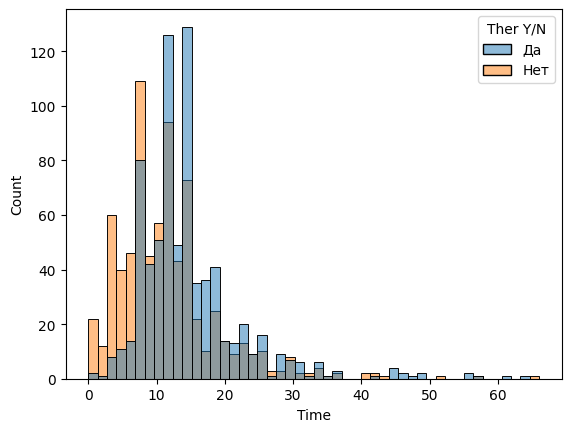

In [216]:
#сроки госпитализации независимо от исхода
sns.histplot(data=data_from_pair,x="Time",hue="Ther Y/N")

In [217]:
data_alive=data_from_pair.loc[data_from_pair['Outcome']=="Выписан"]
data_alive

,CaseID,Gender,Age,Start,End,Ther,Outcome,Vacin,Vac,Vaccine,Vac Y/N,Ther Y/N,Результат_D,Результат,TherHM,Used,Time
2,387627.0,м,74,2022-01-07,2022-02-02,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,604.00,534.3,Middle,NaN,26
5,383786.0,м,69,2021-10-04,2021-10-29,ИНФ (тяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,367.60,1583.0,Hard,NaN,25
9,384829.0,ж,82,2021-10-26,2021-11-06,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,3001.00,1173.0,Middle,NaN,11
12,387657.0,м,82,2022-01-08,2022-01-22,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,1407.00,492.2,Middle,NaN,14
17,384337.0,м,39,2021-10-14,2021-10-22,ИНФ (среднетяжелое течение) с терапией без ЛП,Выписан,NaN,NaN,Нет,Нет,Да,317.80,1300.0,Middle,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,379807.0,м,52,2021-06-27,2021-07-01,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,160.98,909.0,Middle,Да,4
7624,382075.0,ж,78,2021-08-23,2021-09-03,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,486.40,289.1,Middle,Да,11
7629,382374.0,м,73,2021-09-01,2021-09-17,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,669.80,289.6,Middle,Да,16
7661,385959.0,м,59,2021-11-25,2021-12-09,ИНФ (среднетяжелое течение) без ЛП и терапии,Выписан,NaN,Нет,Нет,Нет,Нет,67.73,571.5,Middle,Да,14


<Axes: xlabel='Time', ylabel='Count'>

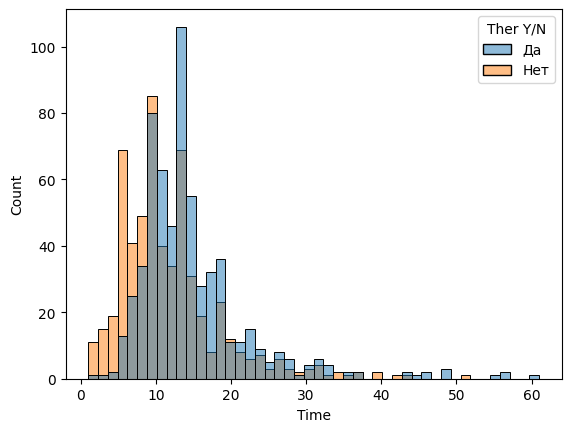

In [218]:
#сроки госпитализации для живых
sns.histplot(data=data_alive,x="Time",hue="Ther Y/N")

# task 4 

Нулевая гипотеза - это предположение, что исследуемые факторы не оказывают
никакого влияния на измеряемый признак и полученные различия (исследуемых параметров,
средних значений количества суток госпитализации у двух групп выше) случайны.

Что если полученное в опыте значение t окажется меньше табличного? Тогда надо принять нулевую гипотезу.

**H0 терапия не оказывает никакого влияния на изменяемый признак (с терапией - без терапии)**

**H1 пациенты с терапией показывают лучшие результаты - (т.е. оказывает влияние)** 

In [219]:
#проверка данных на нормальность
#тест Колмогорова-Смирнова
import math
from scipy.stats import kstest
from scipy. stats import lognorm

In [220]:
import scipy
import matplotlib.pyplot as plt

In [221]:
stat, p = scipy.stats.shapiro(data_with_ther['Age']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.959, p-value=0.000
Отклонить гипотезу о нормальности


In [222]:
stat, p = scipy.stats.normaltest(data_without_ther['Age']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=44.586, p-value=0.000
Отклонить гипотезу о нормальности


### **показатель Age**

Text(0.5, 1.0, 'Log-Transformed Data')

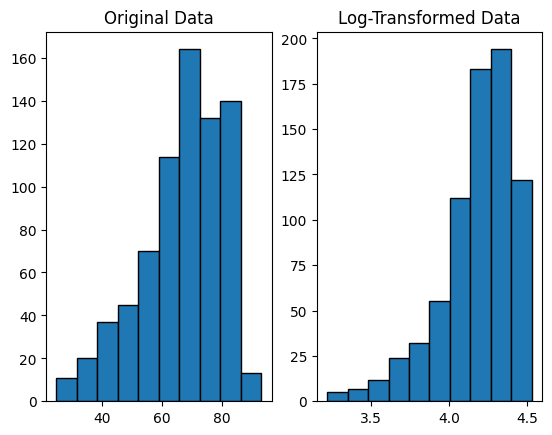

In [223]:
arr_age_with_ther=np.array(data_with_ther['Age'])
arr_age_without_ther=np.array(data_without_ther['Age'])


#пробуем привести к нормальному распределению
arr_age_with_ther_log=np.log(arr_age_with_ther)
arr_age_without_ther_log=np.log(arr_age_without_ther)

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

#create histograms
axs[0]. hist (arr_age_with_ther, edgecolor='black')
axs[1]. hist (arr_age_with_ther_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Cbrt-Transformed Data')

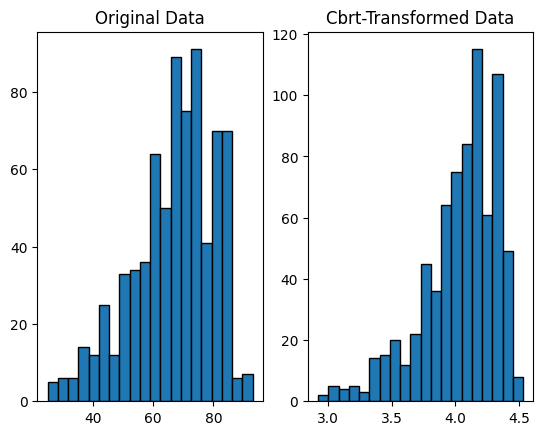

In [224]:
arr_age_with_ther=np.array(data_with_ther['Age'])
arr_age_without_ther=np.array(data_without_ther['Age'])

#пробуем привести к нормальному распределению
arr_age_with_ther_cbrt=np.cbrt(arr_age_with_ther)
arr_age_without_ther_cbrt=np.cbrt(arr_age_without_ther)

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

#create histograms
axs[0]. hist (arr_age_with_ther,bins=20,edgecolor='black')
axs[1]. hist (arr_age_with_ther_cbrt,bins=20, edgecolor='black')
#axs[0].sns.hist()

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cbrt-Transformed Data')

In [225]:
stat, p = scipy.stats.shapiro(arr_age_with_ther_cbrt) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.922, p-value=0.000
Отклонить гипотезу о нормальности


In [226]:
stat, p = scipy.stats.shapiro(arr_age_without_ther_log) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.902, p-value=0.000
Отклонить гипотезу о нормальности


In [227]:
#работаем с возрастом

#arr_age_with_ther

stand_err_mean_1=np.std(arr_age_with_ther, ddof= 1 ) / np.sqrt (np.size (arr_age_with_ther))
print(stand_err_mean_1)

arr_age_with_ther.mean()

0.4940405710329683


66.77479892761394

In [228]:

#arr_age_without_ther

stand_err_mean_2=np.std(arr_age_without_ther, ddof= 1 ) / np.sqrt (np.size (arr_age_without_ther))
print(stand_err_mean_2)

arr_age_without_ther.mean()

0.4994374898652625


66.76005361930295

In [229]:
t_age=(arr_age_with_ther.mean()-arr_age_without_ther.mean())/stand_err_mean_1
t_age

0.029846351039879107

In [230]:
t_age=(arr_age_with_ther.mean()-arr_age_without_ther.mean())/stand_err_mean_2
t_age

0.029523831530889416

Подсчет числа степеней свободы осуществля­ется по формуле:

k = n1 + n2 – 2.   
k=2n-2
k=1492-2=1490

In [231]:
scipy.stats.t.ppf(q=.05,df=1490) #left

-1.645876930808414

In [232]:
scipy.stats.t.ppf(q=1-.05,df=1490) #right

1.6458769308084134

In [233]:
scipy.stats.t.ppf(q=1-.05/2,df=1490) #bothside

1.9615573849940027

stand err mean:  0.4940405710329683
stand err mean:  0.4994374898652625

t_age:  0.029846351039879107
bothside:  1.9615573849940027


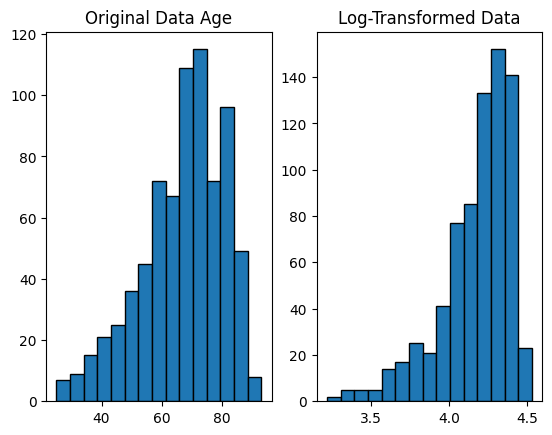

In [234]:
#показатель age
arr_age_with_ther=np.array(data_with_ther['Age'])
arr_age_without_ther=np.array(data_without_ther['Age'])

#пробуем привести к нормальному распределению
arr_age_with_ther_log=np.log(arr_age_with_ther)
arr_age_without_ther_log=np.log(arr_age_without_ther)

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

#create histograms
axs[0]. hist (arr_age_with_ther, bins=15, edgecolor='black')
axs[1]. hist (arr_age_with_ther_log, bins=15, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data Age')
axs[1].set_title('Log-Transformed Data')

#будем проводить расчеты для измененных данных
stand_err_mean_1=np.std(arr_age_with_ther, ddof= 1 ) / np.sqrt (np.size (arr_age_with_ther))
print("stand err mean: ", stand_err_mean_1)

arr_age_with_ther.mean()

stand_err_mean_2=np.std(arr_age_without_ther, ddof= 1 ) / np.sqrt (np.size (arr_age_without_ther))
print("stand err mean: ", stand_err_mean_2)

arr_age_without_ther.mean()

t_age=(arr_age_with_ther.mean()-arr_age_without_ther.mean())/stand_err_mean_1
print("\nt_age: ", t_age)

#Подсчет числа степеней свободы осуществля­ется по формуле:
#k = n1 + n2 – 2
print("bothside: ",scipy.stats.t.ppf(q=1-.05/2,df=1490)) #bothside

Значения t не попадают в критическую область, поэтому нет оснований отвергать нулевую гипотезу, данные сопоставимы

### **показатель D**

stand err mean:  0.036284515769464724
stand err mean:  0.036327941096910926

t_d:  0.11279999905321433
bothside:  1.9615573849940027


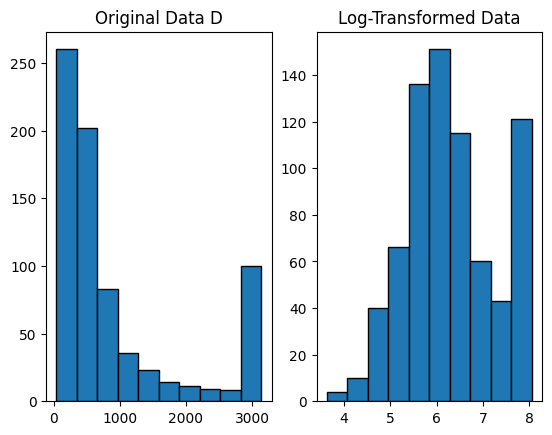

In [235]:
#показатель d
arr_d_with_ther=np.array(data_with_ther['Результат_D'])
arr_d_without_ther=np.array(data_without_ther['Результат_D'])

#пробуем привести к нормальному распределению
arr_d_with_ther_log=np.log(arr_d_with_ther)
arr_d_without_ther_log=np.log(arr_d_without_ther)

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

#create histograms
axs[0]. hist (arr_d_with_ther, edgecolor='black')
axs[1]. hist (arr_d_with_ther_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data D')
axs[1].set_title('Log-Transformed Data')

#будем проводить расчеты для измененных данных
stand_err_mean_3=np.std(arr_d_with_ther_log, ddof= 1 ) / np.sqrt (np.size (arr_d_with_ther_log))
print("stand err mean: ", stand_err_mean_3)

arr_d_with_ther.mean()

stand_err_mean_4=np.std(arr_d_without_ther_log, ddof= 1 ) / np.sqrt (np.size (arr_d_without_ther_log))
print("stand err mean: ", stand_err_mean_4)

arr_d_without_ther.mean()

t_d=(arr_d_with_ther_log.mean()-arr_d_without_ther_log.mean())/stand_err_mean_3
print("\nt_d: ", t_d)

#Подсчет числа степеней свободы осуществля­ется по формуле:
#k = n1 + n2 – 2

#print("\nleft: ",scipy.stats.t.ppf(q=.05,df=1490)) #left
#print("right: ",scipy.stats.t.ppf(q=1-.05,df=1490)) #right
print("bothside: ",scipy.stats.t.ppf(q=1-.05/2,df=1490)) #bothside

### **показатель F**

stand err mean:  0.3312899092257947
stand err mean:  0.3299599695648327

t_f:  0.22799144299163082
bothside:  1.9615573849940027


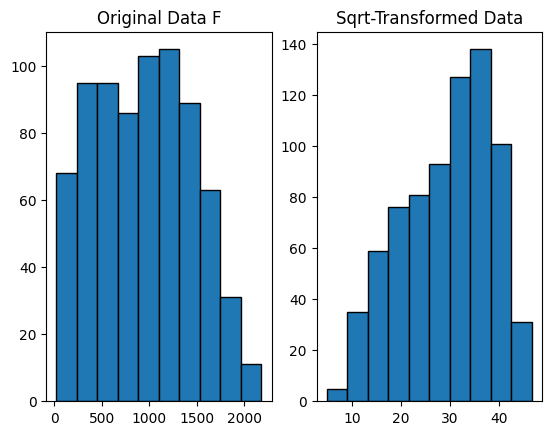

In [236]:
#показатель f
arr_f_with_ther=np.array(data_with_ther['Результат'])
arr_f_without_ther=np.array(data_without_ther['Результат'])

#пробуем привести к нормальному распределению
arr_f_with_ther_sqrt=np.sqrt(arr_f_with_ther)
arr_f_without_ther_sqrt=np.sqrt(arr_f_without_ther)

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

#create histograms
axs[0]. hist (arr_f_with_ther, edgecolor='black')
axs[1]. hist (arr_f_with_ther_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data F')
axs[1].set_title('Sqrt-Transformed Data')

#будем проводить расчеты для измененных данных
stand_err_mean_5=np.std(arr_f_with_ther_sqrt, ddof= 1 ) / np.sqrt (np.size (arr_f_with_ther_sqrt))
print("stand err mean: ", stand_err_mean_5)

arr_f_with_ther.mean()

stand_err_mean_6=np.std(arr_f_without_ther_sqrt, ddof= 1 ) / np.sqrt (np.size (arr_f_without_ther_sqrt))
print("stand err mean: ", stand_err_mean_6)

arr_f_without_ther.mean()

t_f=(arr_f_with_ther_sqrt.mean()-arr_f_without_ther_sqrt.mean())/stand_err_mean_5
print("\nt_f: ", t_f)

#Подсчет числа степеней свободы осуществля­ется по формуле:
#k = n1 + n2 – 2

#print("\nleft: ",scipy.stats.t.ppf(q=.05,df=1490)) #left
#print("right: ",scipy.stats.t.ppf(q=1-.05,df=1490)) #right
print("bothside: ",scipy.stats.t.ppf(q=1-.05/2,df=1490)) #bothside

# task 6

<ipython-input-237-eb4f820dd6be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ther['Age'] = data_with_ther['Age'] - data_with_ther['Age']%5


<Axes: xlabel='Age'>

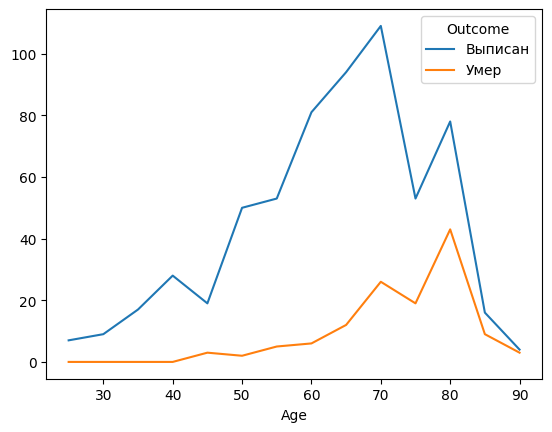

In [237]:
data_with_ther['Age'] = data_with_ther['Age'] - data_with_ther['Age']%5
table_age_data=pd.pivot_table(data_with_ther[['Outcome','Age']],index=['Age'],columns=['Outcome'],aggfunc=len)
table_age_data = table_age_data.fillna(0)
table_age_data.plot.line()

<ipython-input-238-ab82529a99a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther['Age'] = data_without_ther['Age'] - data_without_ther['Age']%5


<Axes: xlabel='Age'>

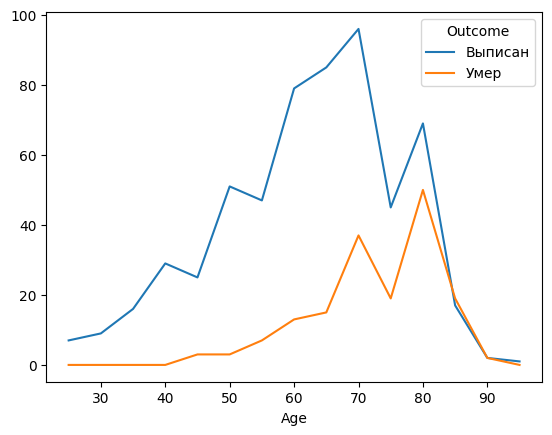

In [238]:
data_without_ther['Age'] = data_without_ther['Age'] - data_without_ther['Age']%5
table_age_data2=pd.pivot_table(data_without_ther[['Outcome','Age']],index=['Age'],columns=['Outcome'],aggfunc=len)
table_age_data2 = table_age_data2.fillna(0)
table_age_data2.plot.line()

<Axes: xlabel='Vac Y/N'>

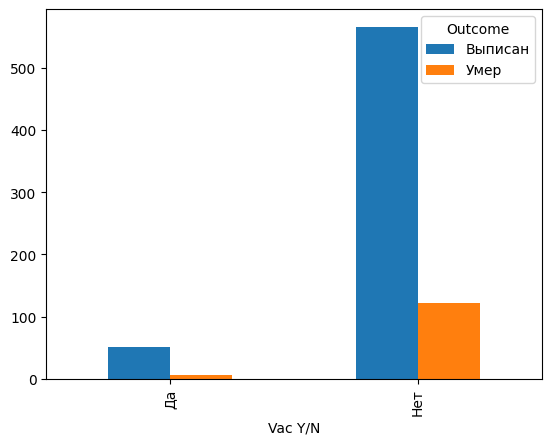

In [239]:
table_vac_data=pd.pivot_table(data_with_ther[['Outcome','Vac Y/N']],index=['Vac Y/N'],columns=['Outcome'],aggfunc=len)
table_vac_data.plot.bar()

<Axes: xlabel='Vac Y/N'>

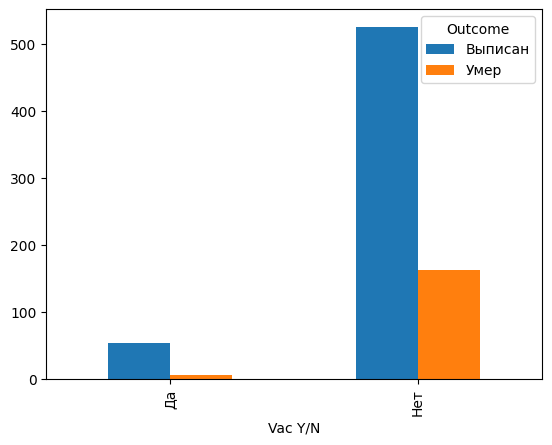

In [240]:
table_vac_data2=pd.pivot_table(data_without_ther[['Outcome','Vac Y/N']],index=['Vac Y/N'],columns=['Outcome'],aggfunc=len)
table_vac_data2.plot.bar()

<Axes: xlabel='Gender'>

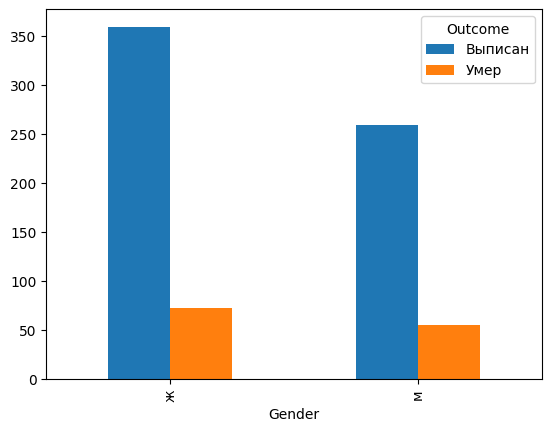

In [241]:
table_gen_data=pd.pivot_table(data_with_ther[['Outcome','Gender']],index=['Gender'],columns=['Outcome'],aggfunc=len)
table_gen_data.plot.bar()

<Axes: xlabel='Gender'>

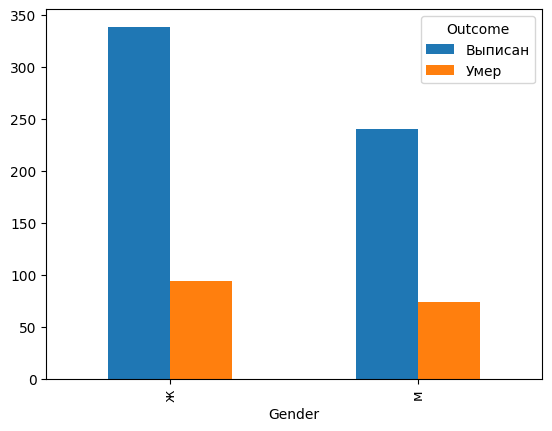

In [242]:
table_gen_data2=pd.pivot_table(data_without_ther[['Outcome','Gender']],index=['Gender'],columns=['Outcome'],aggfunc=len)
table_gen_data2.plot.bar()

<Axes: xlabel='TherHM'>

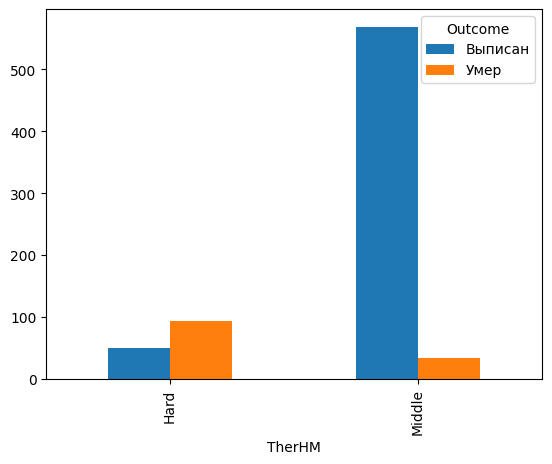

In [243]:
table_HM_data=pd.pivot_table(data_with_ther[['Outcome','TherHM']],index=['TherHM'],columns=['Outcome'],aggfunc=len)
table_HM_data.plot.bar()

<Axes: xlabel='TherHM'>

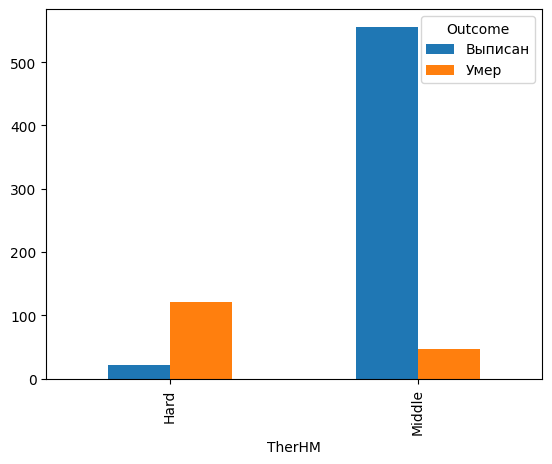

In [244]:
table_HM_data2=pd.pivot_table(data_without_ther[['Outcome','TherHM']],index=['TherHM'],columns=['Outcome'],aggfunc=len)
table_HM_data2.plot.bar()

<ipython-input-245-07b2f43aa2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ther['Результат_D'] = data_with_ther['Результат_D'] - data_with_ther['Результат_D']%100


<Axes: xlabel='Результат_D'>

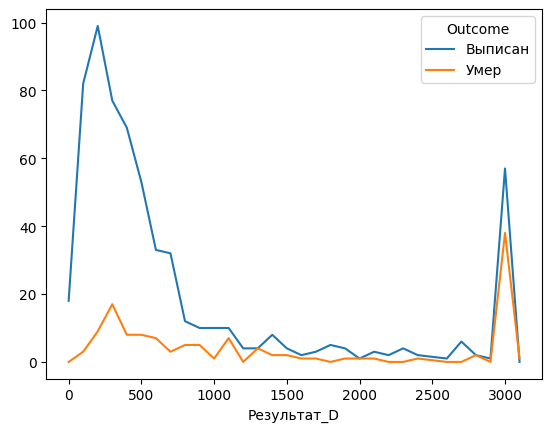

In [245]:
data_with_ther['Результат_D'] = data_with_ther['Результат_D'] - data_with_ther['Результат_D']%100
table_D_data=pd.pivot_table(data_with_ther[['Outcome','Результат_D']],index=['Результат_D'],columns=['Outcome'],aggfunc=len)
table_D_data = table_D_data.fillna(0);
table_D_data.plot.line()

<ipython-input-246-74732aa2b787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther['Результат_D'] = data_without_ther['Результат_D'] - data_without_ther['Результат_D']%100


<Axes: xlabel='Результат_D'>

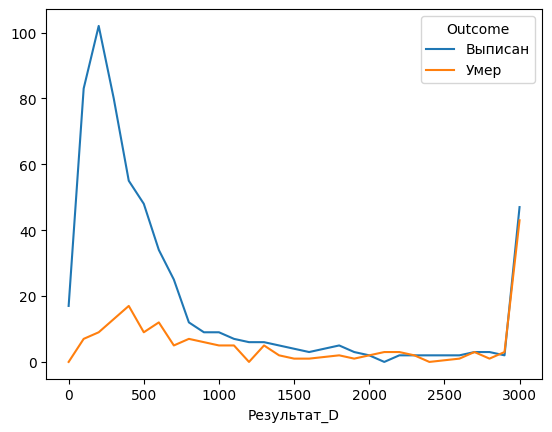

In [246]:
data_without_ther['Результат_D'] = data_without_ther['Результат_D'] - data_without_ther['Результат_D']%100
table_D_data2=pd.pivot_table(data_without_ther[['Outcome','Результат_D']],index=['Результат_D'],columns=['Outcome'],aggfunc=len)
table_D_data2 = table_D_data2.fillna(0);
table_D_data2.plot.line()

<ipython-input-247-1231de95c6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ther['Результат'] = data_with_ther['Результат'] - data_with_ther['Результат']%100


<Axes: xlabel='Результат'>

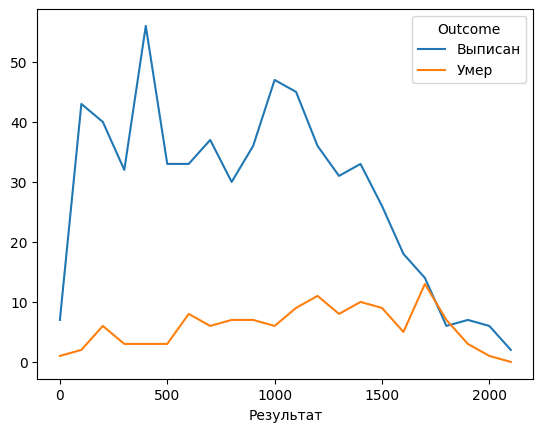

In [247]:
data_with_ther['Результат'] = data_with_ther['Результат'] - data_with_ther['Результат']%100
table_F_data=pd.pivot_table(data_with_ther[['Outcome','Результат']],index=['Результат'],columns=['Outcome'],aggfunc=len)
table_F_data = table_F_data.fillna(0);
table_F_data.plot.line()

<ipython-input-248-7637caea05fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_ther['Результат'] = data_without_ther['Результат'] - data_without_ther['Результат']%100


<Axes: xlabel='Результат'>

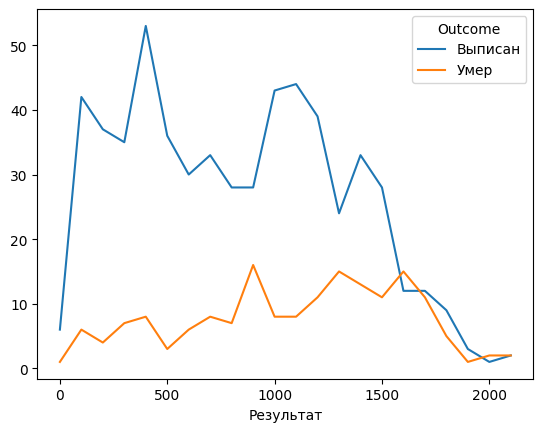

In [248]:
data_without_ther['Результат'] = data_without_ther['Результат'] - data_without_ther['Результат']%100
table_F_data2=pd.pivot_table(data_without_ther[['Outcome','Результат']],index=['Результат'],columns=['Outcome'],aggfunc=len)
table_F_data2 = table_F_data2.fillna(0);
table_F_data2.plot.line()